<h1 align="center"> Лабораторная работа №3 </h1>

---

<h1 align="center"> Университет ИТМО </h1>
<h2 align="center"> Факультет систем управления и робототехники </h2>

---

### Выполнили:
- **Соколов Никита**  
- **Минеев Кирилл**
- **Соловьев Дмитрий**
- **Семёнов Евгений**

---

### Проверил:
- **Догадин Егор Витальевич**

---

### 11 октября 2024 г.

---

# Подготовка.

### Установка необходимых библиотек:

In [481]:
!pip install numpy matplotlib mpl-tools

In [482]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

## Задание 1. Создание кубика

In [483]:
def basic_cube():
    vertices_cube = np.array([
    [-1, 1, 1,-1,-1, 1, 1,-1],  # x координаты 
    [-1,-1, 1, 1,-1,-1, 1, 1],  # y координаты
    [-1,-1,-1,-1, 1, 1, 1, 1],  # z координаты
    [ 1, 1, 1, 1, 1, 1, 1, 1]   # однородные координаты для применения матричных преобразований в 3D
    ])

    faces_cube = np.array([
        [0, 1, 5, 4],           # грань куба между вершинами 0, 1, 5, 4
        [1, 2, 6, 5],           # грань куба между вершинами 1, 2, 6, 5
        [2, 3, 7, 6],           # грань куба между вершинами 2, 3, 7, 6
        [3, 0, 4, 7],           # грань куба между вершинами 3, 0, 4, 7
        [0, 1, 2, 3],           # нижняя грань куба
        [4, 5, 6, 7]            # верхняя грань куба
    ])

    return vertices_cube, faces_cube

### Функция построения куба:

In [484]:
def plot_cubes(cubes, angles = (45, 45)):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    ax.axes.set_xlim3d(left=-2, right=6)
    ax.axes.set_ylim3d(bottom=-2, top=6)
    ax.axes.set_zlim3d(bottom=-2, top=6)
    
    ax.view_init(angles[0], angles[1])
    
    for c in cubes:
        vertices, faces = c[0], c[1]
        verticals = list(zip(*vertices[:3]))
        poly3d = [[verticals[faces[ix][iy]] for iy in range(faces.shape[1])] for ix in range(faces.shape[0])]
        
        ax.scatter(*vertices[:3])
        ax.add_collection3d(Poly3DCollection(poly3d, linewidth = 0.1, edgecolor='black', alpha = 0.5))
        
    plt.show()


### Наш кубик:

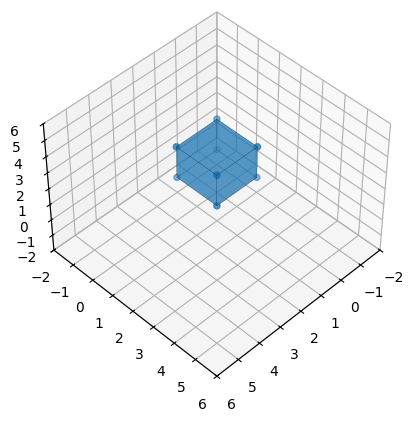

In [485]:
cube = basic_cube()
plot_cubes([cube])

### Мы использовали 4-х компонентные векторы для задание вершин куба. Это так называемые однородные координаты. К привычным трем координатам xyz добавляем четвертую w = 1. Это облегчает запись преобразований пространства. Так в декартовых координатах вращение и масштабирование можно описать матрицей 3х3, однако смещение нельзя. В однородных координатах все три преобразования записываются как матрица 4х4 и реализуются через матричное умножение.

### Мы можем задать фигуру любой формы, используя то, что в компьютерной графике называется полигональной сеткой

## Задание 2. Масштабирование

### Матрица масштабирования:

In [486]:
def scale(scale_x, scale_y, scale_z):  # a diagonal matrix 4x4 is used for scaling
    return np.diag(np.array([scale_x, scale_y, scale_z, 1]))

### Масштабируем исходный кубик:

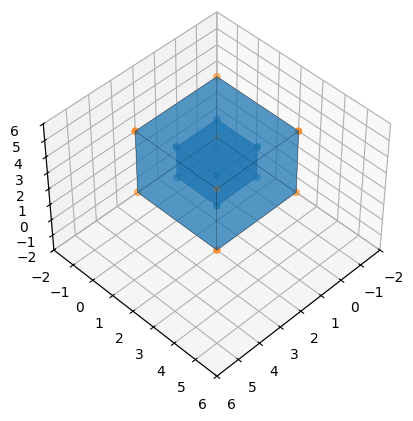

In [487]:
cube = basic_cube()
cube_scaled = (np.dot(scale(2, 2, 2), cube[0]), cube[1])
plot_cubes([cube, cube_scaled])

## Задание 3. Перемещение

### Матрица перемещения:

In [488]:
def translate(translate_x, translate_y, translate_z):
    return np.array([[1, 0, 0, translate_x],
                     [0, 1, 0, translate_y],
                     [0, 0, 1, translate_z],
                     [0, 0, 0, 1]])

### Переместим куб:

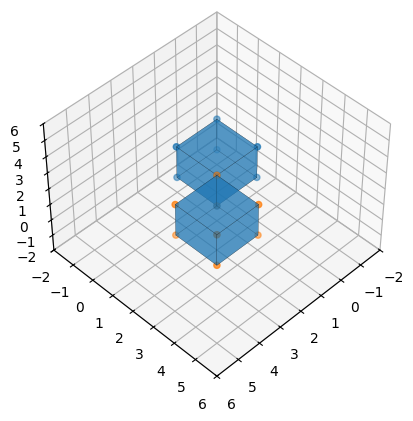

In [489]:
cube = basic_cube()
cube_translated = (np.dot(translate(2, 2, 0), cube[0]), cube[1])
plot_cubes([cube, cube_translated])

### Как видим, порядок комбинации масштабирования и перемещения важен:

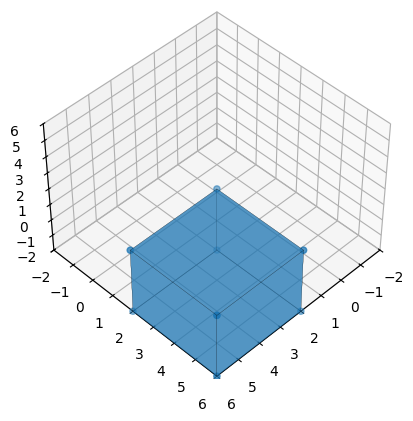

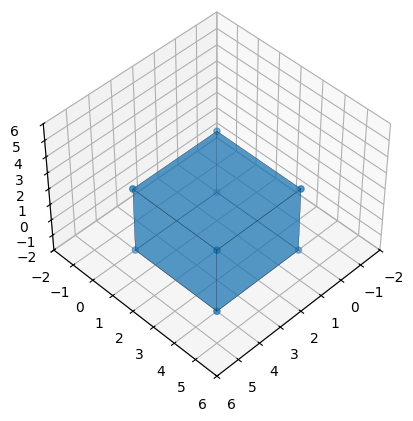

In [490]:
cube_translated_scaled  =  (np.dot(scale(2, 2, 2), cube_translated[0]), cube_translated[1])
plot_cubes([cube_translated_scaled ])
cube_scaled_translated = (np.dot(translate(2, 2, 0), cube_scaled[0]), cube_scaled[1])
plot_cubes([cube_scaled_translated])

### Выводы:
* В случае T*S объект сначала масштабируется, а затем перемещается. Это означает, что он переместится ровно на заданные значения 
translate_x, translate_y, translate_z независимо от его нового размера.

* В случае S*T объект сначала перемещается, а затем масштабируется. Это означает, что не только размеры объекта изменятся, но и его смещение относительно начальной точки будет масштабироваться. Например, если мы увеличим объект в два раза, то и его сдвиг тоже увеличится в два раза.

Доказать это можно, перемножив две матрицы, поменяв их порядок.

## Задание 4. Вращение

### Пусть повороты будут на 45 градусов:

In [491]:
theta = np.pi / 4

### Поворот относительно Ох:

In [492]:
def rotate_x(theta_angle):
    return np.array([
        [1, 0, 0, 0],
        [0, np.cos(theta_angle), -np.sin(theta_angle), 0],
        [0, np.sin(theta_angle), np.cos(theta_angle), 0],
        [0, 0, 0, 1]
    ])

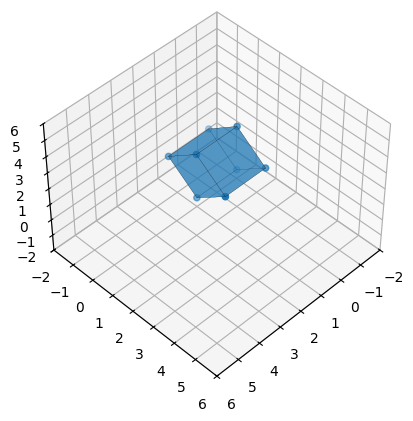

In [493]:
cube = basic_cube()
cube_rotated = (np.dot(rotate_x(theta), cube[0]), cube[1])
plot_cubes([cube_rotated])

### Поворот относительно Оу:

In [494]:
def rotate_y(theta_angle):
    return np.array([
        [np.cos(theta_angle), 0, np.sin(theta_angle), 0],
        [0, 1, 0, 0],
        [-np.sin(theta_angle), 0, np.cos(theta_angle), 0],
        [0, 0, 0, 1]
    ])

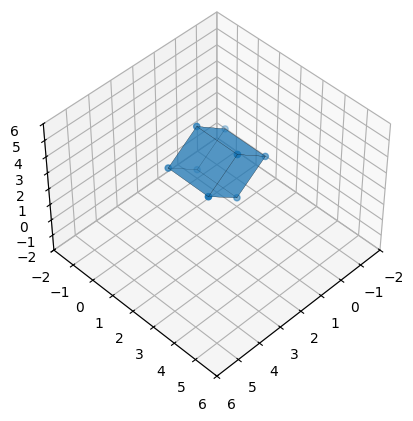

In [495]:
cube = basic_cube()
cube_rotated = (np.dot(rotate_y(theta), cube[0]), cube[1])
plot_cubes([cube_rotated])

### Поворот относительно Оz:

In [496]:
def rotate_z(theta_angle):
    return np.array([
        [np.cos(theta_angle), -np.sin(theta_angle), 0, 0],
        [np.sin(theta_angle), np.cos(theta_angle), 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1]
    ])

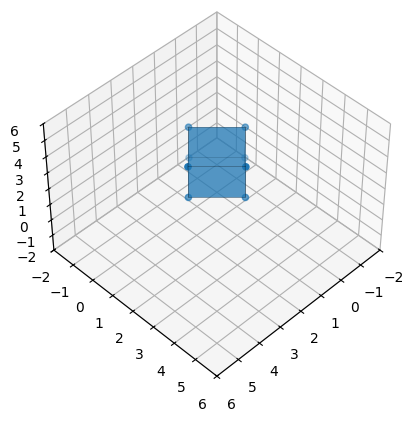

In [497]:
cube = basic_cube()
cube_rotated = (np.dot(rotate_z(theta), cube[0]), cube[1])
plot_cubes([cube_rotated])

### Вывод: матрицы поворота не коммутативны

## Задание 5. Вращение около одной вершины

Матрица вращения вокруг произвольной оси

In [498]:
def rotate(theta_angle, v):
    v = v / np.linalg.norm(v)
    return np.array([
        [np.cos(theta_angle) + v[0] ** 2 * (1 - np.cos(theta_angle)), v[0] * v[1] * (1 - np.cos(theta_angle)) - v[2] * np.sin(theta_angle), v[0] * v[2] * (1 - np.cos(theta_angle)) + v[1] * np.sin(theta_angle), 0],
                    [v[0] * v[1] * (1 - np.cos(theta_angle)) + v[2] * np.sin(theta_angle), np.cos(theta_angle) + v[1] ** 2 * (1 - np.cos(theta_angle)), v[1] * v[2] * (1 - np.cos(theta_angle)) - v[0] * np.sin(theta_angle), 0],
                    [v[0] * v[2] * (1 - np.cos(theta_angle)) - v[1] * np.sin(theta_angle), v[1] * v[2] * (1 - np.cos(theta_angle)) + v[0] * np.sin(theta_angle), np.cos(theta_angle) + v[2] ** 2 * (1 - np.cos(theta_angle)), 0],
                    [0, 0, 0, 1]
    ])

Повернем куб относительно одной вершины

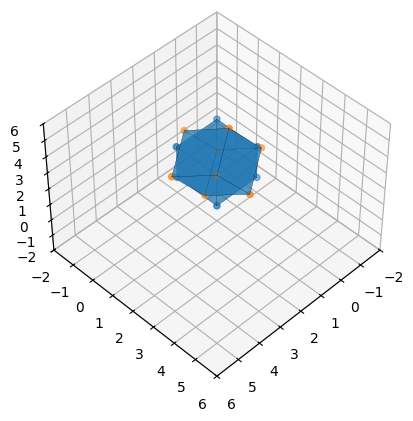

In [499]:
cube = basic_cube()
cube_rotated = (np.dot(rotate(theta, np.array([1, 1, 1])), cube[0]), cube[1])
plot_cubes([cube, cube_rotated])


## Задание 6. Реализация камеры

### Матрицы изменения положения матрицы:

In [500]:
def camera(camera_position, camera_target, up_vector):
	vector = camera_target - camera_position
	vector = vector / np.linalg.norm(vector)

	vector2 = np.cross(up_vector, vector)
	vector2 = vector2 / np.linalg.norm(vector2)

	vector3 = np.cross(vector, vector2)
    
	return np.array([
		[vector2[0], vector3[0], vector[0], 0.0],
		[vector2[1], vector3[1], vector[1], 0.0],
		[vector2[2], vector3[2], vector[2], 0.0],
		[-np.dot(vector2, camera_position), -np.dot(vector3, camera_position), np.dot(vector, camera_position), 1.0]
	])

### Разместим на сцене два кубика:

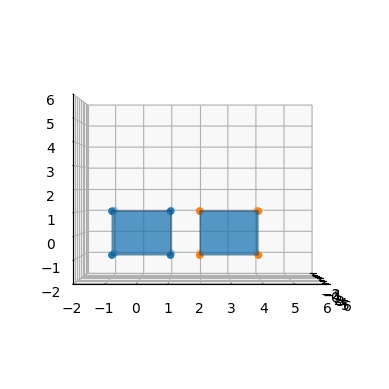

In [501]:
cube1 = basic_cube()
cube2 = (np.dot(translate(0, 3, 0), cube[0]), cube[1])
plot_cubes([cube1, cube2], (0, 0))

### Изменим положение камеры:

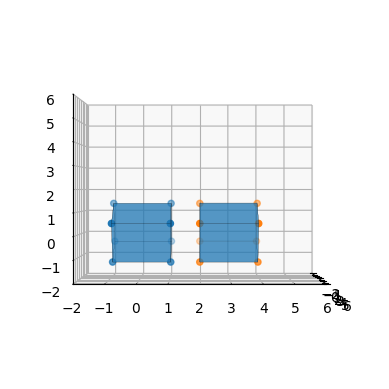

In [502]:
center = np.array([0.0, 0.0, 0.0])
target = np.array([0.5, 0, 1])
up = np.array([0.0, 1, 0])

cube1 = (np.dot(camera(center, target, up), cube1[0]), cube1[1])
cube2 = (np.dot(camera(center, target, up), cube2[0]), cube2[1])

plot_cubes([cube1, cube2], (0, 0))

## Задание 7. Реализация перспективы

### Матрица изменения перспективы:

In [503]:
def perspective(fov, near_plane, far_plane):
	return np.array([
		[1.0 / np.tan(fov / 2.0), 0.0, 0.0, 0.0],
		[0.0, 1.0 / np.tan(fov / 2.0), 0.0, 0.0],
		[0.0, 0.0, far_plane / (near_plane - far_plane), -1.0],
		[0.0, 0.0, (near_plane * far_plane) / (near_plane - far_plane), 0.0]
	])

### Применим матрицу изменения перспективы:

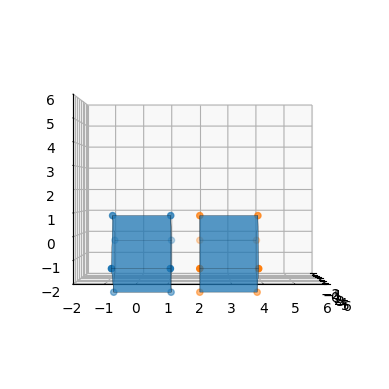

In [504]:
fov = np.pi / 2
near_plane = 0.1
far_plane = 0.4

cube1 = (np.dot(perspective(fov, near_plane, far_plane), cube1[0]), cube1[1])
cube2 = (np.dot(perspective(fov, near_plane, far_plane), cube2[0]), cube2[1])

plot_cubes([cube1, cube2], (0, 0))